# Homework 9: Group 1
#### Decision Trees (Lending Club Data)

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

### Question 1 EDA (20 points) In this exercise I want you to do a quick EDA on the Lending club data set. The data is available on the Github repository for the course. All the variable names are self explanatory except the dti which stands for disposable debt to income ratio. Also note that loan status=0 means default and 1 means good condition (no default). Show me what you have learned from the previous EDAs you did in HW2, HW3 and, HW8. Try to come up with an interesting story (hypothesis) using this data set. Treat this exercise as a real world project. Many times the managers have no idea what they want from the data!! your job is to be as creative as possible and come up with informative charts and tables. Import the lendingclub.cvs as df.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as ss
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("lendingclub.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_ownership  2270 non-null   int64  
 1   income          2270 non-null   float64
 2   dti             2270 non-null   float64
 3   fico            2270 non-null   int64  
 4   loan_status     2270 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 88.8 KB


In [5]:
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [6]:
# lets get income denominated in dollars to make it simple
df["income"] = df["income"]*1000

In [7]:
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43000.0,39.66,670,0
1,1,80000.0,39.54,685,1
2,0,30000.0,39.52,695,1
3,1,105000.0,39.45,710,0
4,0,28600.0,39.28,680,1


In [8]:
# Let's examine the split between those who defaulted (0) and those who are in good condition (1)
pd.crosstab(df["loan_status"], df["loan_status"],  normalize='all')*100

loan_status,0,1
loan_status,,
0,35.066079,0.000000
1,0.000000,64.933921


In [9]:
# loan_status has 0 = default and 1 = "good condition". Let's reverse this so we can predict default = 1
df["loan_status"] = np.where(df["loan_status"] == 1, 0, 1)

In [11]:
pd.crosstab(df["loan_status"], df["loan_status"],  normalize='all')*100
# we successfully switched the values, now 1 = default

loan_status,0,1
loan_status,,
0,64.933921,0.000000
1,0.000000,35.066079


In [13]:
df.isna().sum()
# We have a clean dataset! Tiny bam! 

home_ownership    0
income            0
dti               0
fico              0
loan_status       0
dtype: int64

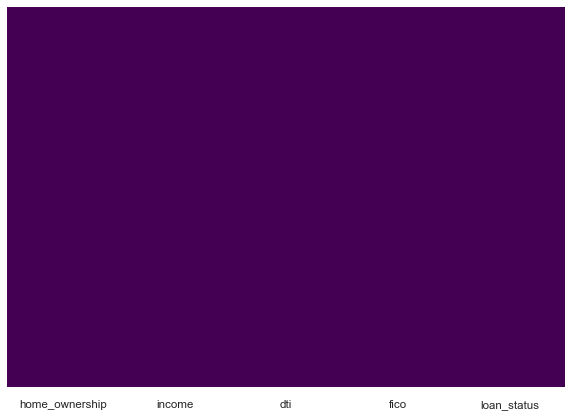

In [10]:
# Now look at "nan" values:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
# Look if duplicates in our dataset:
sum(df.duplicated())

# There are no duplicates! Tiny bam! 

0

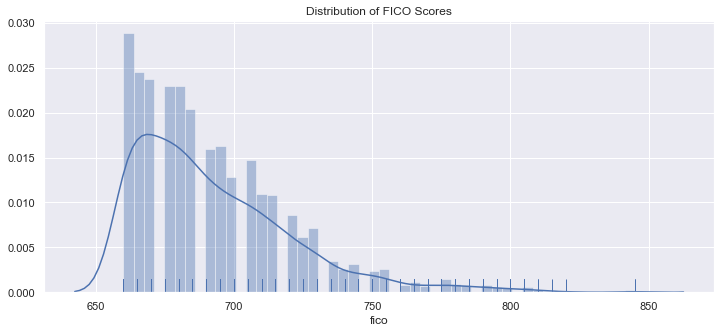

In [15]:
# Lets check out some distributions:
plt.figure(figsize=(12,5))
sns.distplot(df["fico"], 50, kde=True, rug=True)
plt.title('Distribution of FICO Scores')
plt.show()

We may have to normalize or standardize these scores, as we can see it is heavily right skewed! 

<AxesSubplot:>

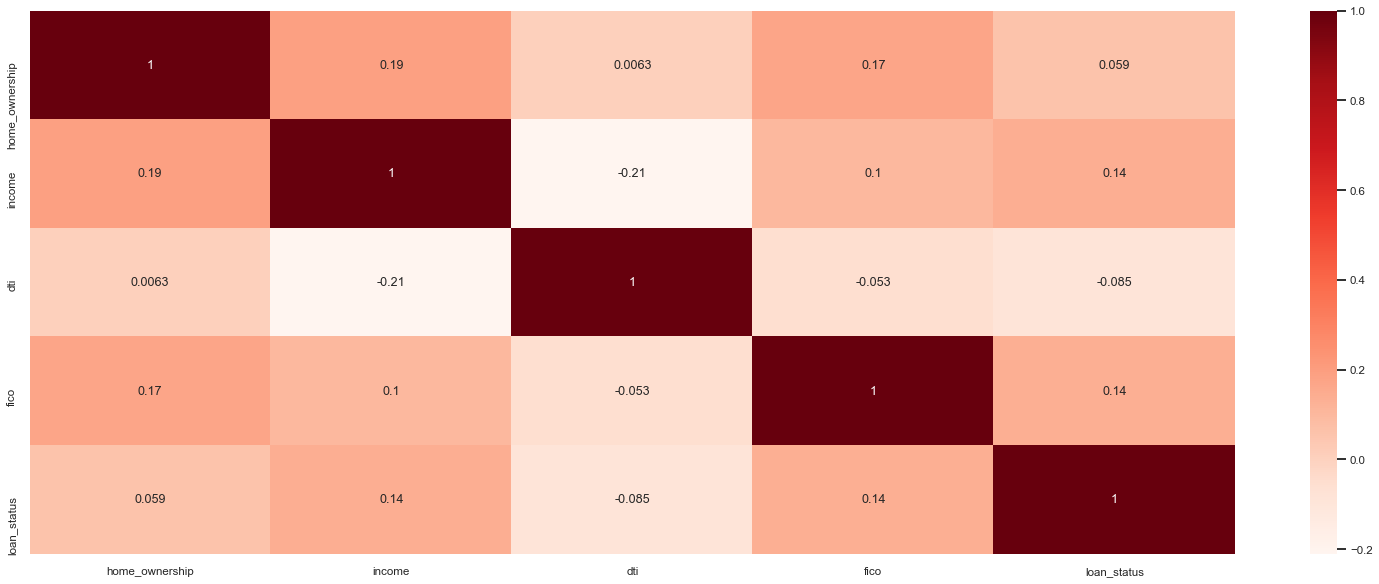

In [8]:
# Examining possible correlation between loan status and other variables:

sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,:].corr(), cmap='Reds', annot=True)

#### Our variables have low correlations given the coefficients shown by the heatmap. 

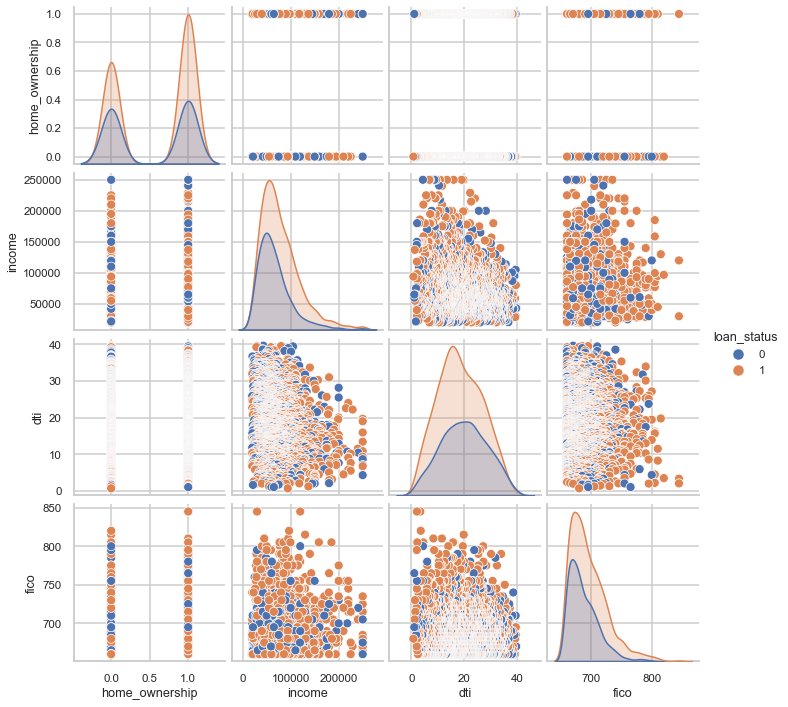

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'loan_status')
plt.show()

## Question 2 Decision Trees Classiﬁcation (80 points) For this exercise, I want you to use loan status as the target variable  and answer the following questions.
### 1. What are the proportions of Good condition loans vs defaulted ones in the data set? Is the target variable (relatively) balanced or (relatively) imbalanced? (5 points) 

In [15]:
# Let's examine the split between those who defaulted (0) and those who are in good condition (1)
pd.crosstab(df["loan_status"], df["loan_status"],  normalize='all')*100

loan_status,0,1
loan_status,,
0,35.066079,0.000000
1,0.000000,64.933921


#### Our dataset is relatively balanced--35% no-default and 65% default. 

### 2. Along with the target variable, deﬁne your feature space (X) and split the data into test (20%) and train set (80%) (5 points) 

In [17]:
# Defining the variables and splitting the dataset:

y = df['loan_status']
X = df.drop('loan_status', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [19]:
# head of training datatset:

X_train.head(10)

,home_ownership,income,dti,fico
1377,1,108000.00,15.96,685
1803,1,150000.00,11.30,685
1431,1,54000.00,15.38,665
1666,1,50000.00,13.13,720
425,1,77721.00,27.18,800
159,1,51000.00,32.09,695
58,0,37812.32,34.78,660
1980,0,45000.00,8.92,695
1251,0,52000.00,17.40,710
959,0,70439.00,20.53,715


## From sklearn.svm import the relevant function for DTs classiﬁcation. Do the followings: (20 points)
### 1. Train the DT classiﬁcation model using its default inputs. (5 points) 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### 2. Make classiﬁcations on the test set and save them as y hat (5 points) 

In [22]:
# Predicting the Test set classes
y_hat = Tree_classifier.predict(X_test)

### 3. Use the built-in classiﬁcation report function from sklearn. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why? (10 points)


In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [24]:
# printing the confusion matrix:

print(confusion_matrix(y_test, y_hat))

[[ 64  96]
 [111 183]]


In [25]:
# Built-in classification report:

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38       160
           1       0.66      0.62      0.64       294

    accuracy                           0.54       454
   macro avg       0.51      0.51      0.51       454
weighted avg       0.55      0.54      0.55       454



#### We trust the accuracy of the model, because our dataset was relatively balanced. However, we are not satisified with the accuracy score. 

## 4. Pruning the tree: plot the accuracy CV vs alphas from the cost complexity pruning path. Report the optimal value for alpha. (10 points)

In [26]:
# Pruning the tree using cost complexity pruning method:

path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)

In [27]:
path

{'ccp_alphas': array([0.        , 0.0003304 , 0.00034263, 0.00034263, 0.00035042,
        0.00035745, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00036711, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00036711, 0.00036711, 0.00037275, 0.00041097, 0.000413  ,
        0.000413  , 0.000413  , 0.000413  , 0.000413  , 0.000413  ,
        0.000413  , 0.000413  , 0.000413  , 0.000413  , 0.00044053,
        0.00044053, 0.00044053, 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00045054, 0.00045888, 0.00045888,
        0.00045888, 0.00045888, 0.00045888, 0.00045888, 0.00045888,
        0.00045888, 0.00045888, 0.00045888, 0.00045968, 0.00047199,
        0.00047199, 0.00047199, 0.00047199, 0.00047199, 0.00048183,
        0.00048183, 0.00048183, 0.00048183, 0.00048948, 0.00048948,
        0.00048948, 0.00048948, 0.00048948, 0.00049504, 0.00049559,
        0.00049559, 0.00049559, 0.

In [28]:
ccp_alphas = path.ccp_alphas

In [29]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [30]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.547911
1,0.000330,0.553972
2,0.000343,0.550112
3,0.000343,0.557272
4,0.000350,0.551768


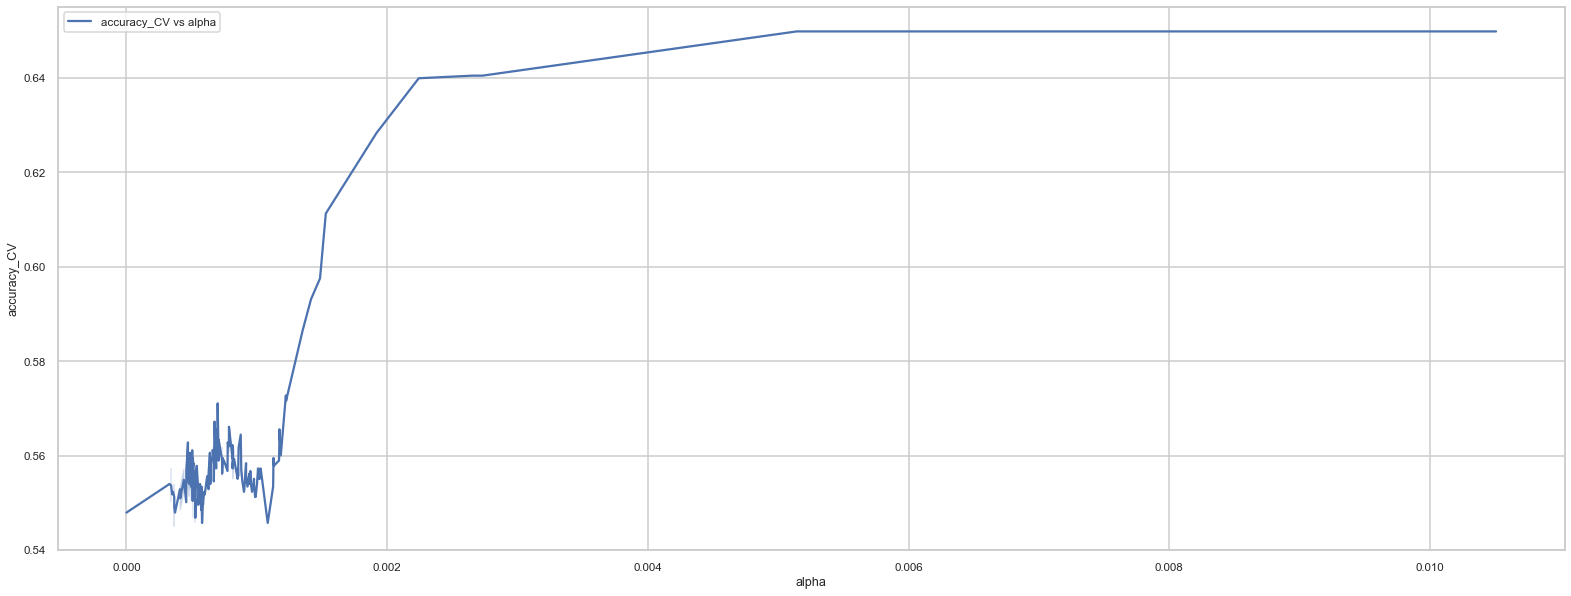

In [31]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [32]:
np.argmax(output['accuracy_CV'])

212

In [33]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.005143
accuracy_CV    0.649781
Name: 212, dtype: float64

In [37]:
optimal_alpha= output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.005142538659615947

#### The maximum accuracy is around 65% and the optimal alpha is .005. 

### 5. Re-estimate (Re-ﬁt) the DT classiﬁcation model with the optimal parameters from the gridsearch method. Save the predictions as y hat optimized (5 points) 

optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [39]:
# Viewing the confusion matrix after optimization:
print(confusion_matrix(y_test, y_hat_opt))

[[  0 160]
 [  0 294]]


### 6. Report the optimized classiﬁcation metrics and compare them with the outputs from part 3.3 in Question2. Do you notice anything strange? what is going on here? (5 points)

In [41]:
# Viewing the built-in classification report:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.65      1.00      0.79       294

    accuracy                           0.65       454
   macro avg       0.32      0.50      0.39       454
weighted avg       0.42      0.65      0.51       454



#### The model is predicting everyone will default in order to get the highest accuracy with optimal alpha, but we will do further optimization using cross validation and setting hyperparameters. 

### 7. Estimate the optimized accuracy test using 5 fold cross validation. (5 points)


In [44]:
# We will attempt to get an estimate for the accuracy of our model using Cross Validation:

from sklearn.model_selection import cross_val_score


In [45]:
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [46]:
accuracy

array([0.64835165, 0.65013774, 0.65013774, 0.65013774, 0.65013774])

In [47]:
round(accuracy.mean(),3)

0.65

#### Using alpha and cross validation, the optimal accuracy level is 65%. 

## 8. Visualize a classiﬁcation tree with the following hyper parameters: max depth=4, min samples leaf=50. (20 points)


### 1. In your decision tree, what is the best feature to start with and where does the algorithm put the cut oﬀ point? (5 points)

#### We think the best feature to start with is dti, because it shows the relationship between a person's debt level to income (dti) and default. Those with a higher dti have a higher chance of defaulting. The algorithm will put the cut off point where sampel size cannot be greater than 50 at the next decision node. Or, it hits a depth of 4. 

In [64]:
# Viewing the columns of the dataset:
df.columns

Index(['home_ownership', 'income', 'dti', 'fico', 'loan_status'], dtype='object')

In [58]:
dtree= DecisionTreeClassifier(max_depth=4, ccp_alpha=0, min_samples_leaf=50)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [60]:
from sklearn import tree

In [61]:
X_train.shape

(1816, 4)

In [62]:
X_train.head()

,home_ownership,income,dti,fico
1377,1,108000.0,15.96,685
1803,1,150000.0,11.30,685
1431,1,54000.0,15.38,665
1666,1,50000.0,13.13,720
425,1,77721.0,27.18,800


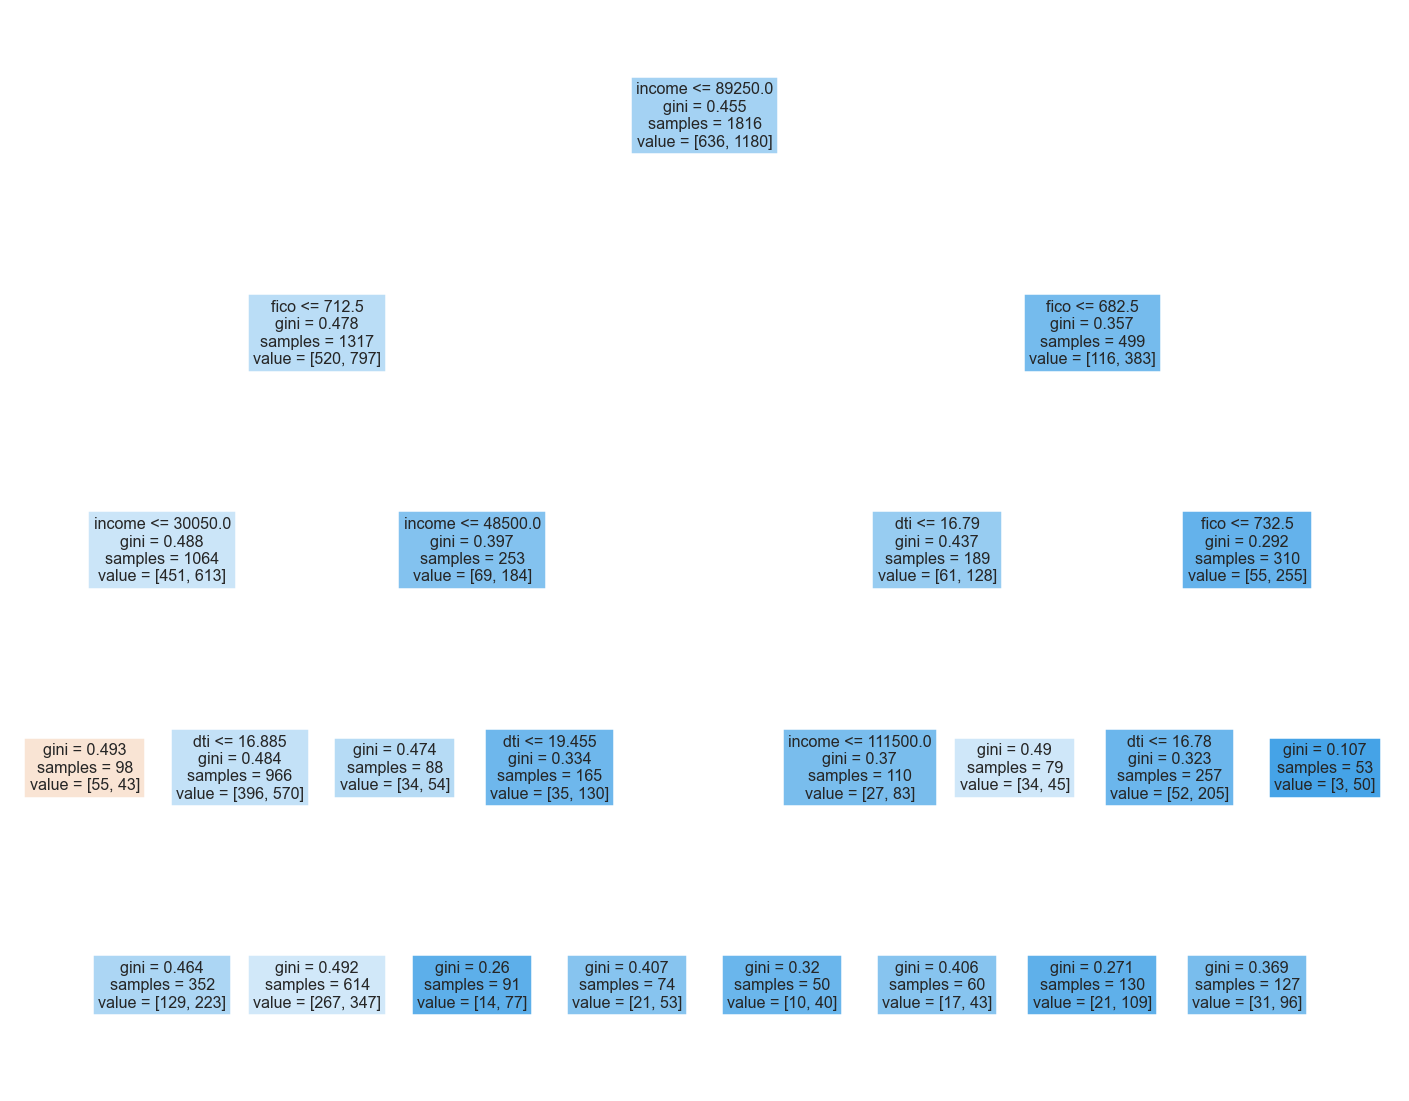

In [63]:
fig = plt.figure(figsize=(25,20))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

### 2. Interpret what you see! take one path for example and go down the tree. If income < ... and ﬁco < .... and .... then default or good condition (5 points) 

#### If a person's income is greater than or equal to 89,250 dollars, then we look to see if their fiaco score is less than or equal to 682. if yes, then is their dti less than or equal to 16.79. Then if yes, is there income less than or equal to 115,000 dollars. If yes, then 40% of observations will be predicted to default and 10% did not default. 

### 3. How many terminal nodes do you see? why the number of terminal nodes is less than 16 in this example? (5 points) 

##### There is a total of 12 terminal nodes. We did not have 16 terminal nodes because the model ran out of observations to carry out a split. 

### 4. Are you satisﬁed with the gini numbers at the terminal nodes in general? explain why? (5 points)


#### We are not fully satisifed witht he gini numbers at the terminal nodes in general, because we are not suprised that they are higher. A high Gini coefficient is saying that it is difficult to predict our feature variable (loan_status). When you examine our various scatter plots, we could see that the observations are very entangled and difficult to parse out, hence the gini numbers at the terminal nodes. 